In [1]:
from utils import load_dict_from_file, all_int_in_set, flatten
from utils_nlp import get_number_tokens
import numpy as np
import os
import pandas as pd

from dotenv import load_dotenv

load_dotenv()

dataset_name = os.getenv("dataset_name")
data_path = os.getenv("data_path")

In [2]:
list_question_ids = [0, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 107, 108]

In [11]:
results_dict = load_dict_from_file(data_path + "02_09_LINK_10k.json")

Dictionary loaded from ../data/results/02_09_LINK_10k.json


In [43]:
print(results_dict['0']['answer_0']['context'])

pharyngitis -> contraindication -> Desmopressin
pharyngitis -> contraindication -> Floxuridine
pharyngitis -> contraindication -> Fluorouracil
pharyngitis -> contraindication -> Nicotine
skin disease -> contraindication -> Synthetic camphor
skin disease -> contraindication -> Cysteamine
skin disease -> contraindication -> Lindane
skin disease -> contraindication -> Lidocaine
skin disease -> contraindication -> Methyl salicylate
skin disease -> contraindication -> Benzocaine
skin disease -> contraindication -> Capsaicin
skin disease -> contraindication -> Racementhol
skin disease caused by infection -> parent-child -> infective dermatitis associated with HTLV-1
pharyngitis -> indication -> Guaifenesin
pharyngitis -> indication -> Meclocycline
pharyngitis -> indication -> Amoxicillin
pharyngitis -> indication -> Cyclacillin
pharyngitis -> indication -> Bacampicillin
pharyngitis -> indication -> Cefradine
pharyngitis -> indication -> Amphotericin B
pharyngitis -> indication -> Demeclocycl

In [13]:
list_precision = []
list_recall = []
list_f1_score = []
list_precision_sim = []
list_recall_sim = []
list_answer_in_context = []
list_matching_reponse_id = []
list_matching_reponse_id_sim = []
for item in results_dict.keys():
    item_as_int = int(item)
    if item_as_int in list_question_ids:
        answer_id = all_int_in_set(set(results_dict[item]["answer_id_"]))
        answer_dicts = [answer_ for answer_ in results_dict[item].keys() if type(results_dict[item][answer_]) == dict]

        for dict_name in answer_dicts:
            response_id = all_int_in_set(set(flatten(results_dict[item][dict_name]["matching_ids"])))
            response_id_sim = all_int_in_set(set(flatten(results_dict[item][dict_name]["matching_ids_sim"])))

            # response_name = set(results_dict[item][dict_name]["response"])
            context_ = results_dict[item][dict_name]["context"]


            list_precision.append(len(response_id.intersection(answer_id)) / len(response_id) if len(response_id) > 0 else 0)
            list_recall.append(len(response_id.intersection(answer_id)) / len(answer_id) if len(answer_id) > 0 else 0)
            list_f1_score.append(2 * (list_precision[-1] * list_recall[-1]) / (list_precision[-1] + list_recall[-1]) if (list_precision[-1] + list_recall[-1]) > 0 else 0)
            list_precision_sim.append(len(response_id_sim.intersection(answer_id)) / len(response_id_sim) if len(response_id_sim) > 0 else 0)
            list_recall_sim.append(len(response_id_sim.intersection(answer_id)) / len(answer_id) if len(answer_id) > 0 else 0)
            # list_matching_reponse_id.append(len(response_id)/len(response_name) if len(response_name) > 0 else 0)
            # list_matching_reponse_id_sim.append(len(response_id_sim)/len(response_name) if len(response_name) > 0 else 0)

            count_in_context = 0
            indx = 0
            for answer in results_dict[item]["answer_name"]:
                if answer in context_:
                    count_in_context += 1


            is_in_context = count_in_context/len(results_dict[item]["answer_name"])

            list_answer_in_context.append(is_in_context)     


print("Precision: ", sum(list_precision) / len(list_precision))
print("Recall: ", sum(list_recall) / len(list_recall))
print("F1 score: ", sum(list_f1_score) / len(list_f1_score))
# print("Matching response id: ", sum(list_matching_reponse_id) / len(list_matching_reponse_id))
# print("Precision sim: ", sum(list_precision_sim) / len(list_precision_sim))
# print("Recall sim: ", sum(list_recall_sim) / len(list_recall_sim))
# print("Matching response id sim: ", sum(list_matching_reponse_id_sim) / len(list_matching_reponse_id_sim))
print("Answer in context: ", sum(list_answer_in_context) / len(list_answer_in_context))

Precision:  0.23481049446291555
Recall:  0.38960573476702504
F1 score:  0.2360968318883864
Answer in context:  0.6991039426523298


In [14]:
# Precision:  0.11609443054397177
# Recall:  0.308702311675442
# Matching response id:  1.027064220183486
# Precision sim:  0.04020634866177958
# Recall sim:  0.3816885721556667
# Matching response id sim:  4.381422018348625
# Answer in context:  0.7064220183486238

In [15]:
# SHORTEST PATH WITH KG AND SIM
# Precision:  0.1255358621517248
# Recall:  0.3165465155964205
# Matching response id:  1.0337895422870604
# Precision sim:  0.11956571820085125
# Recall sim:  0.2944973289492845
# Matching response id sim:  0.9923161208332771
# Answer in context:  0.6330275229357798

# ENTITY LINKS WITH KG
# Precision:  0.09578141807373627
# Recall:  0.1644432181370858
# Answer in context:  0.23853211009174313

# GPT4
# Precision:  0.058409785932721704
# Recall:  0.05952380952380955
# Matching response id:  0.5668807339449538
# Precision sim:  0.089388379204893
# Recall sim:  0.07121860420565229
# Matching response id sim:  0.9996330275229357

In [16]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# By question

In [39]:
def get_dict_compiled_results(results_dict):
    list_precision = []
    list_recall = []
    list_answer_in_context = []
    list_len_context = []
    list_smallest_context_needed = []
    list_matching_reponse_id = []
    for item in results_dict.keys():
        list_precision_ = []
        list_recall_ = []
        list_answer_in_context_ = []
        list_len_context_ = []
        list_smallest_context_needed_ = []
        list_matching_reponse_id_ = []
        answer_id = set(results_dict[item]["answer_id_"])
        answer_dicts = [answer_ for answer_ in results_dict[item].keys() if type(results_dict[item][answer_]) == dict]

        for dict_name in answer_dicts:
            response_id = set(flatten(results_dict[item][dict_name]["matching_ids"]))
            response_name = set(flatten(results_dict[item][dict_name]["matching_ids"]))

            # print(response_id)
            # print(answer_id)
            context_ = results_dict[item][dict_name]["context"]
            list_len_context_.append(get_number_tokens(context_))

            list_precision_.append(len(response_id.intersection(answer_id)) / len(response_id) if len(response_id) > 0 else 0)
            list_recall_.append(len(response_id.intersection(answer_id)) / len(answer_id) if len(answer_id) > 0 else 0)
            list_matching_reponse_id_.append(len(response_id)/len(response_name) if len(response_name) > 0 else 0)

            count_in_context = 0
            indx = 0
            for answer in results_dict[item]["answer_name"]:
                if answer in context_:
                    count_in_context += 1
                    # find where answer in in context_
                    indx_ = context_.index(answer)
                    if indx_ > indx:
                        indx = indx_
                else:
                    indx = 999999

            if indx == 999999:
                list_smallest_context_needed_.append(np.nan)
            else:
                list_smallest_context_needed_.append(get_number_tokens(context_[:indx]))

            is_in_context = count_in_context/len(results_dict[item]["answer_name"])

            list_answer_in_context_.append(is_in_context)  

        list_precision.append(list_precision_)
        list_recall.append(list_recall_)
        list_answer_in_context.append(list_answer_in_context_)
        list_len_context.append(list_len_context_)
        list_smallest_context_needed.append(list_smallest_context_needed_)
        list_matching_reponse_id.append(list_matching_reponse_id_)

        dict_ = {
            "precision": list_precision,
            "recall": list_recall,
            "answer_in_context": list_answer_in_context,
            "len_context": list_len_context,
            "smallest_context_needed": list_smallest_context_needed,
            "matching_reponse_id": list_matching_reponse_id
        } 
    return dict_


In [40]:
results_ = get_dict_compiled_results(results_dict)

In [41]:
for item in np.arange(0, len(list_precision[0])):
    print("Precision: ", sum([results_["precision"][i][item] for i in np.arange(0, len(results_["precision"]))]) / len(results_["precision"]))
    print("Recall: ", sum([results_["recall"][i][item] for i in np.arange(0, len(results_["recall"]))]) / len(results_["recall"]))
    print("Answer in context: ", sum([results_["answer_in_context"][i][item] for i in np.arange(0, len(results_["answer_in_context"]))]) / len(results_["answer_in_context"]))
    print("Len context: ", sum([results_["len_context"][i][item] for i in np.arange(0, len(results_["len_context"]))]) / len(results_["len_context"]))
    print("Smallest context needed: ", np.nansum([results_["smallest_context_needed"][i][item] for i in np.arange(0, len(results_["smallest_context_needed"]))]) / len(results_["smallest_context_needed"]))
    print("Matching response id: ", sum([results_["matching_reponse_id"][i][item] for i in np.arange(0, len(results_["matching_reponse_id"]))]) / len(results_["matching_reponse_id"]))

Precision:  0.2543354660113849
Recall:  0.36337114597971804
Answer in context:  0.693925247549527
Len context:  9657.477064220184
Smallest context needed:  1656.6605504587155
Matching response id:  1.0


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def get_variable_name(variable):
    names = [name for name in globals() if globals()[name] is variable]
    if names:
        return names[0]
    return None

def plot_by_question(data, name_of_metric="metric"):
    if name_of_metric=="metric":
        name_of_metric = get_variable_name(data)

    # Calculate mean, min, and max for each question
    means = [np.nanmean(d) for d in data]
    mins = [np.min(d) for d in data]
    maxs = [np.max(d) for d in data]
    lower_errors = np.clip([m_ - min_ for m_, min_ in zip(means, mins)], 0, 1)
    upper_errors = np.clip([max_ - m_ for m_, max_ in zip(means, maxs)], 0, 1)

    # Plotting
    questions = np.arange(0, len(data))

    plt.figure(figsize=(14, 8))

    is_nan = np.isnan(means)
    print(is_nan)

    plt.errorbar(questions[is_nan], np.array(means)[is_nan], yerr=[np.array(lower_errors)[is_nan], np.array(upper_errors)[is_nan]], color='green')    
    plt.errorbar(questions[~is_nan], np.array(means)[~is_nan], yerr=[np.array(lower_errors)[~is_nan], np.array(upper_errors)[~is_nan]], fmt='o', ecolor='red', capsize=5, marker='o', markersize=5, color='blue')    

    # plt.errorbar(questions, means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5, color='blue')

    plt.xlabel('Question', fontsize=14)
    plt.ylabel(f"{name_of_metric}", fontsize=14)
    plt.title(f"Mean {name_of_metric} with Error Bars for Each Question", fontsize=16)
    plt.xticks(questions, rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def get_variable_name(variable):
    names = [name for name in globals() if globals()[name] is variable]
    if names:
        return names[0]
    return None

def plot_by_question(data, name_of_metric="metric", data2=None):
    if name_of_metric == "metric":
        name_of_metric = get_variable_name(data)



    # Plotting
    questions = np.arange(0, len(data))

    plt.figure(figsize=(14, 8))


    def plot_(data_):
        # Calculate mean, min, and max for each question
        means = [np.nanmean(d) for d in data_]
        mins = [np.nanmin(d) if len(d) > 0 else np.nan for d in data_]
        maxs = [np.nanmax(d) if len(d) > 0 else np.nan for d in data_]
        lower_errors = np.clip([m_ - min_ for m_, min_ in zip(means, mins)], 0, 1)
        upper_errors = np.clip([max_ - m_ for m_, max_ in zip(means, maxs)], 0, 1)

        # Plot non-NaN points
        is_nan = np.isnan(means)
        plt.errorbar(questions[~is_nan], np.array(means)[~is_nan], yerr=[np.array(lower_errors)[~is_nan], np.array(upper_errors)[~is_nan]], 
                    fmt='o', ecolor='red', capsize=5, marker='o', markersize=5, color='blue')    

        if np.sum(is_nan) > 0:
            # Explicitly plot NaN points as green dots
            plt.scatter(questions[is_nan], np.zeros_like(questions[is_nan]), color='green', s=100, label="NaN Points")

    plot_(data)
    if data2 is not None:
        plot_(data2)

    plt.xlabel('Question', fontsize=14)
    plt.ylabel(f"{name_of_metric}", fontsize=14)
    plt.title(f"Mean {name_of_metric} with Error Bars for Each Question", fontsize=16)
    plt.xticks(questions, rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    plt.tight_layout()
    plt.show()

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/3866158434.py:24: RuntimeWarning: Mean of empty slice
  means = [np.nanmean(d) for d in data_]
/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/3866158434.py:25: RuntimeWarning: All-NaN axis encountered
  mins = [np.nanmin(d) if len(d) > 0 else np.nan for d in data_]
/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/3866158434.py:26: RuntimeWarning: All-NaN axis encountered
  maxs = [np.nanmax(d) if len(d) > 0 else np.nan for d in data_]
/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/3866158434.py:32: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions[~is_nan], np.array(means)[~is_nan], yerr=[np.array(lower_errors)[~is_nan], np.array(upper_errors)[~is_nan]],


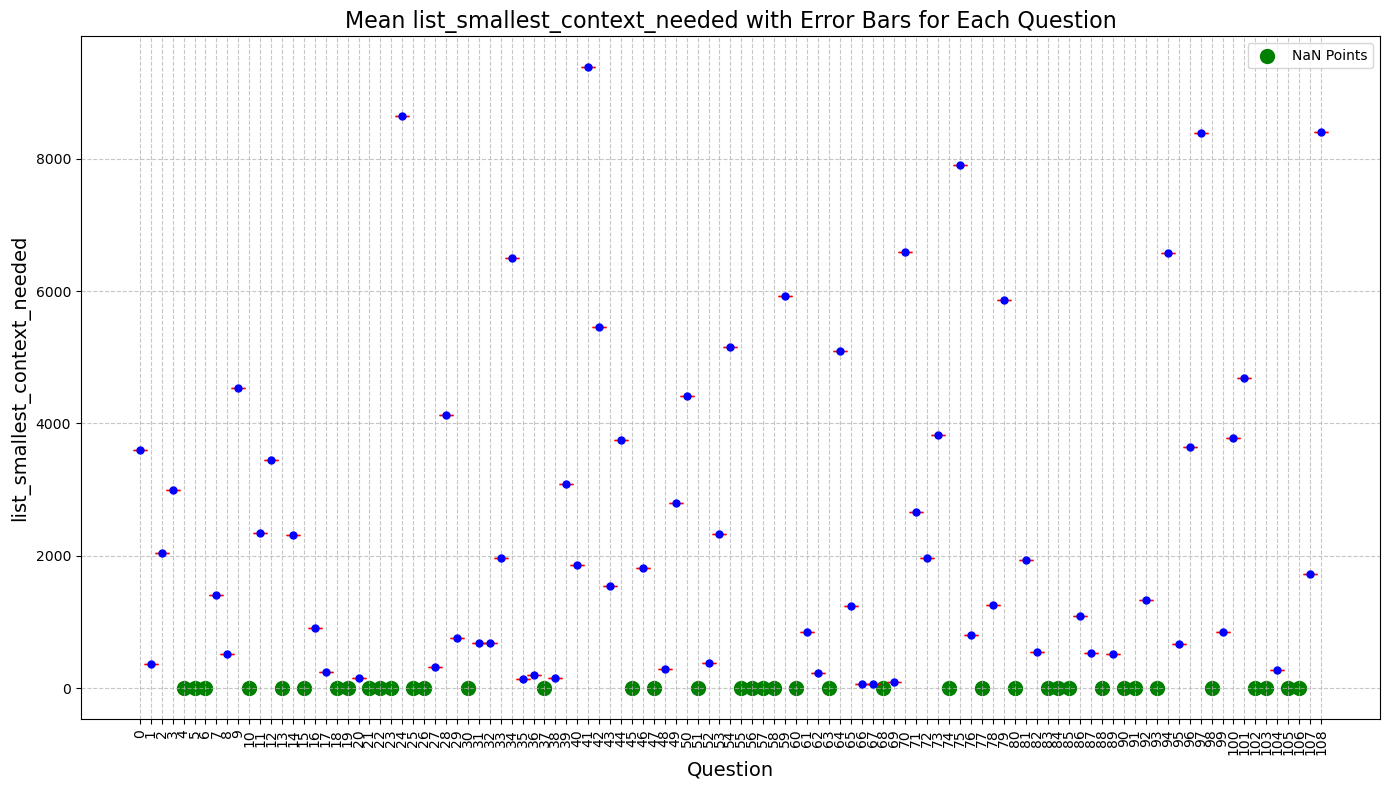

In [38]:
plot_by_question(list_smallest_context_needed)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions[~is_nan], np.array(means)[~is_nan], yerr=[np.array(lower_errors)[~is_nan], np.array(upper_errors)[~is_nan]],
/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


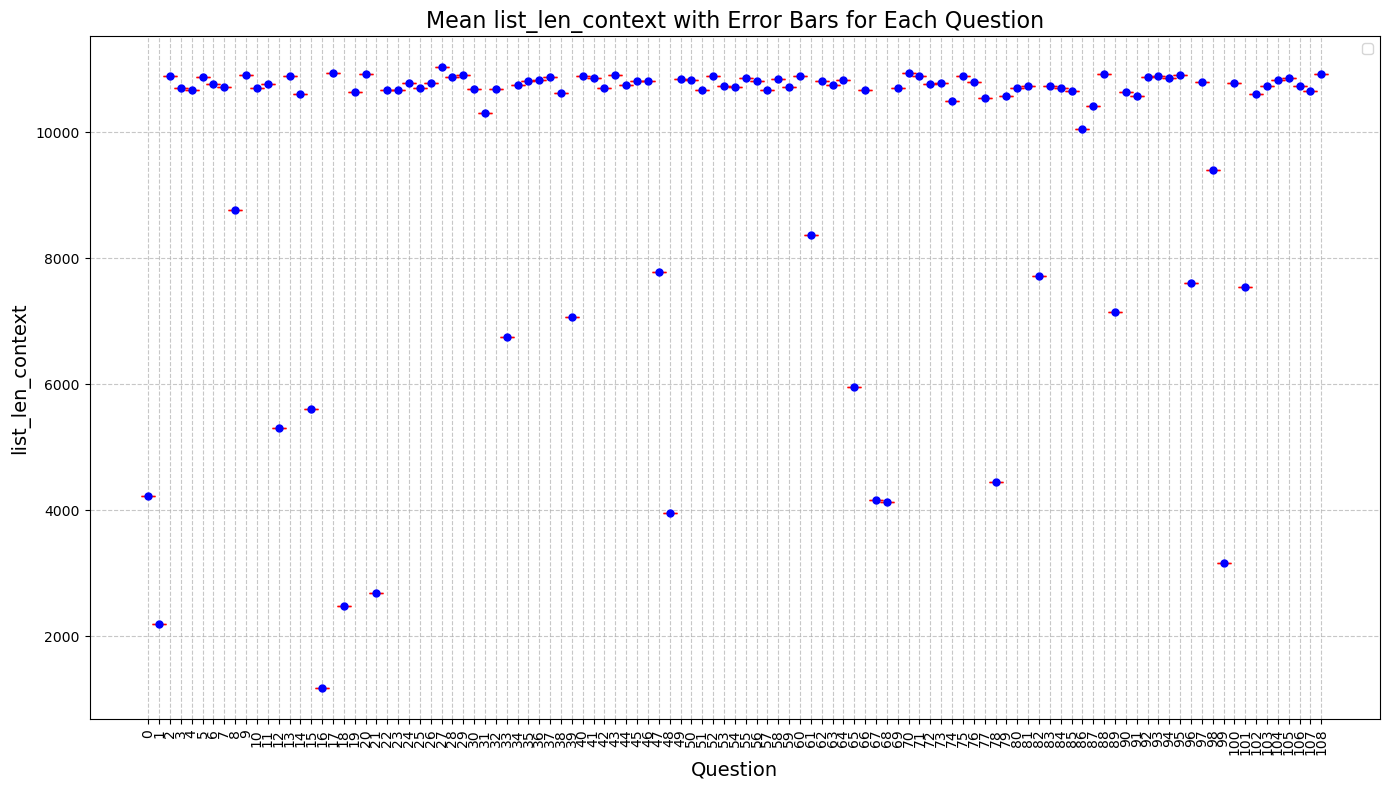

In [33]:
plot_by_question(list_len_context)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions[~is_nan], np.array(means)[~is_nan], yerr=[np.array(lower_errors)[~is_nan], np.array(upper_errors)[~is_nan]],
/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


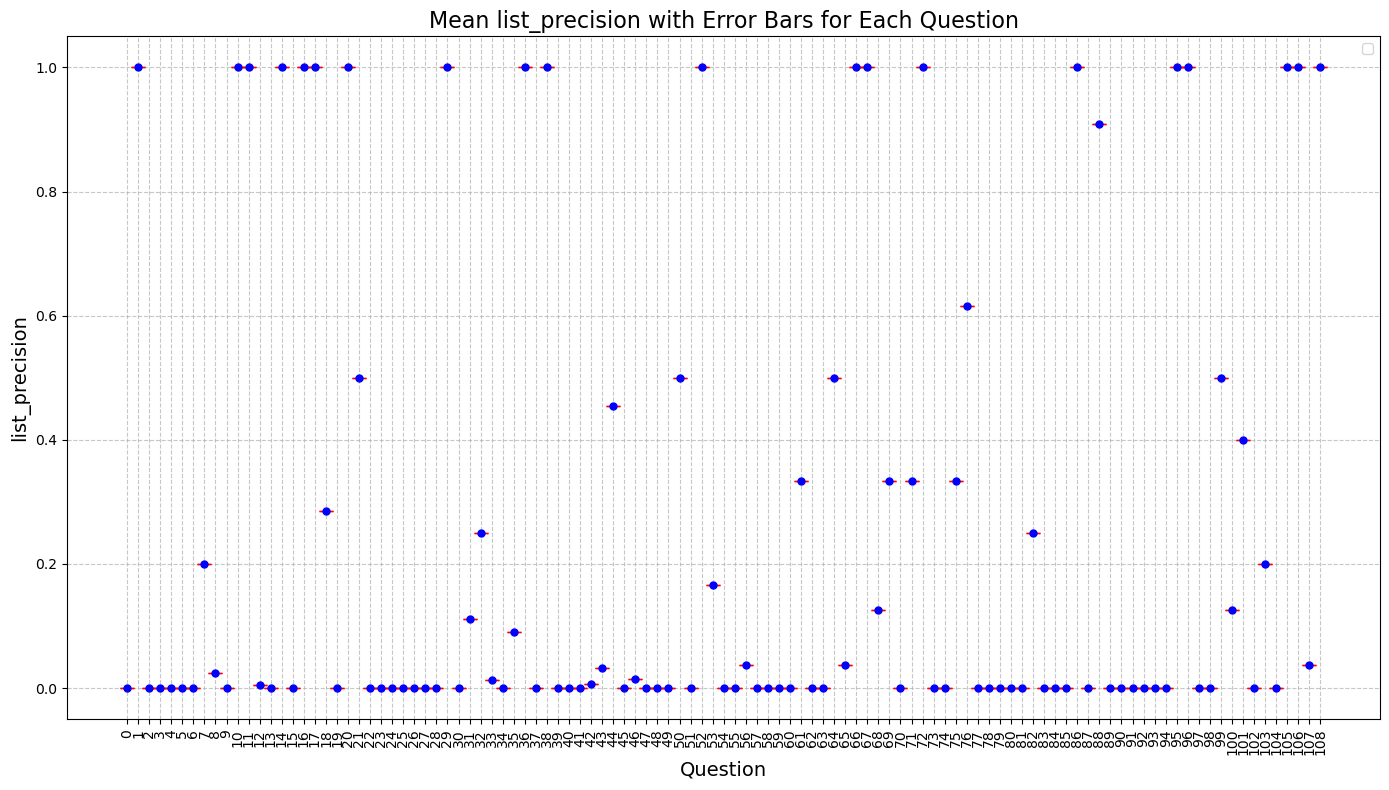

In [34]:
plot_by_question(list_precision)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions[~is_nan], np.array(means)[~is_nan], yerr=[np.array(lower_errors)[~is_nan], np.array(upper_errors)[~is_nan]],
/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


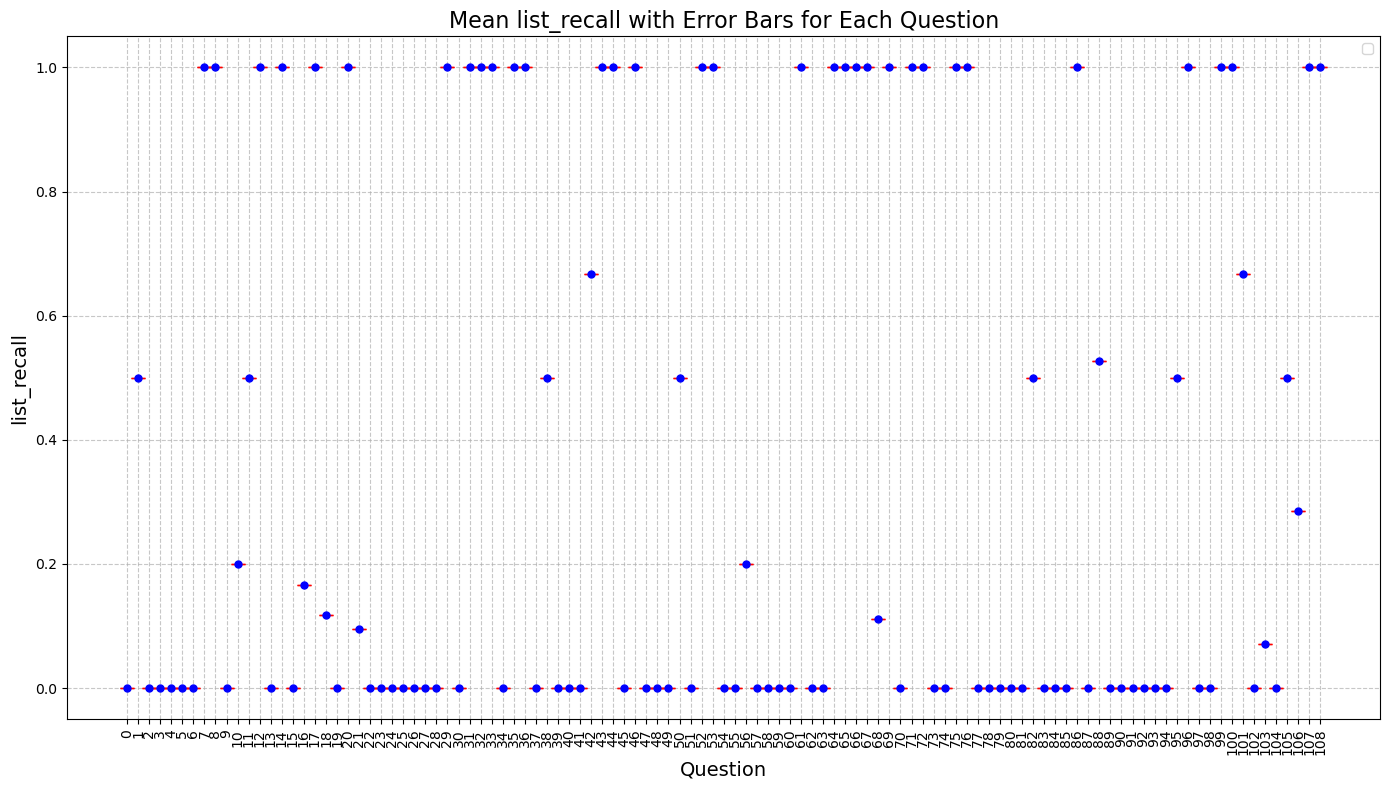

In [35]:
plot_by_question(list_recall)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions[~is_nan], np.array(means)[~is_nan], yerr=[np.array(lower_errors)[~is_nan], np.array(upper_errors)[~is_nan]],
/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_93156/2471352948.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


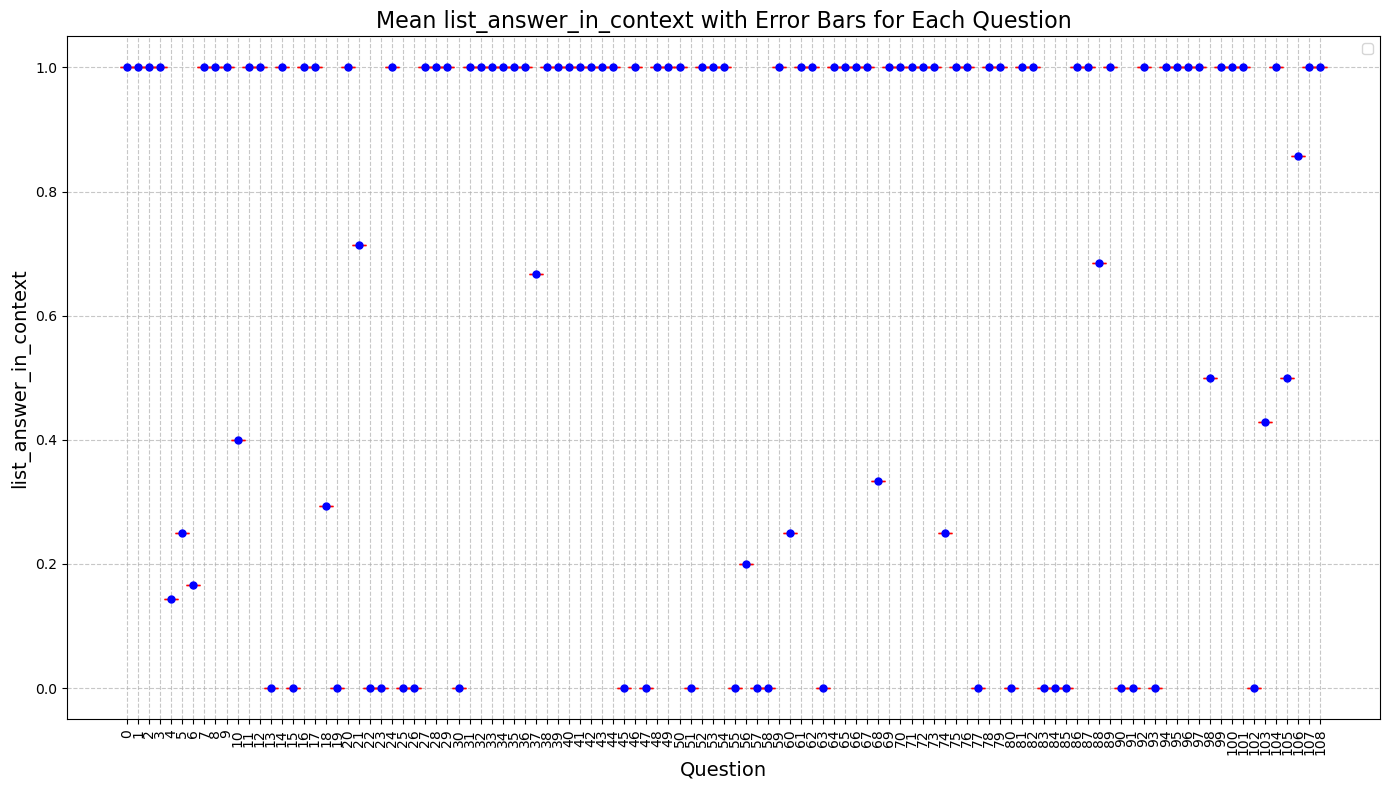

In [36]:
plot_by_question(list_answer_in_context)

In [ ]:
def plot_by_question_all(precision_, recall_, in_context_, len_context_):
    # Plotting all metrics for each question in the same plot
    # Note that len_context needs to be on a different axis because it is a different scale

    questions = np.arange(0, len(precision_))

    fig, ax1 = plt.subplots(figsize=(14, 8))

    ax1.set_xlabel('Question', fontsize=14)
    ax1.set_ylabel('Metrics', fontsize=14)

    ax1.plot(questions, precision_, color="green", marker='o', markersize=5, label='Precision')
    ax1.plot(questions, recall_, color="blue", marker='o', markersize=5, label='Recall')
    ax1.plot(questions, in_context_, color="black", marker='o', markersize=5, label='In context')

    ax2 = ax1.twinx()

    ax2.set_ylabel('Len context', fontsize=14)
    ax2.plot(questions, len_context_, color='purple', marker='o', markersize=5, label='Len context')

    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_by_question_all_subplot(precision_, recall_, in_context_, list_smallest_context_needed, len_context_):
    questions = np.arange(0, len(precision_))

    fig, axs = plt.subplots(5, 1, figsize=(14, 12), sharex=True)

    axs[0].plot(questions, precision_, color="green", marker='o', markersize=5, label='Precision')
    axs[0].set_ylabel('Precision', fontsize=12)
    axs[0].legend(loc='upper right')
    axs[0].grid(True)

    axs[1].plot(questions, recall_, color="blue", marker='o', markersize=5, label='Recall')
    axs[1].set_ylabel('Recall', fontsize=12)
    axs[1].legend(loc='upper right')
    axs[1].grid(True)

    axs[2].plot(questions, in_context_, color="black", marker='o', markersize=5, label='In context')
    axs[2].set_ylabel('In context', fontsize=12)
    axs[2].legend(loc='upper right')
    axs[2].grid(True)

    axs[3].plot(questions, list_smallest_context_needed, color="purple", marker='o', markersize=5, label='Len context')
    axs[3].set_ylabel('Smallest context', fontsize=12)
    axs[3].set_xlabel('Question', fontsize=14)
    axs[3].legend(loc='upper right')
    axs[3].grid(True)


    axs[4].plot(questions, len_context_, color="red", marker='o', markersize=5, label='Len context')
    axs[4].set_ylabel('Len context', fontsize=12)
    axs[4].set_xlabel('Question', fontsize=14)
    axs[4].legend(loc='upper right')
    axs[4].grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
np.mean(list_answer_in_context)

In [ ]:
plot_by_question_all_subplot(list_precision, list_recall, list_answer_in_context, list_smallest_context_needed, list_len_context)

In [ ]:
df = pd.DataFrame(zip(list_len_context, list_precision, list_recall, list_smallest_context_needed, list_answer_in_context), columns=["len_context", "precision", "recall", "smallest_context_needed", "answer_in_context"])
# make all values in the dataframe from list to int
df["len_context"] = df["len_context"].apply(lambda x: int(x[0]))
df["precision"] = df["precision"].apply(lambda x: float(x[0]))
df["recall"] = df["recall"].apply(lambda x: float(x[0]))
df["answer_in_context"] = df["answer_in_context"].apply(lambda x: float(x[0]))
df["smallest_context_needed"] = df["smallest_context_needed"].apply(lambda x: float(x[0]))

# make a correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
df_ = df[(df["answer_in_context"] > 0)]
df_

# get all columns to lists
list_len_context_ = df_["len_context"].tolist()
list_precision_ = df_["precision"].tolist()
list_recall_ = df_["recall"].tolist()
list_smallest_context_needed_ = df_["smallest_context_needed"].tolist()
list_answer_in_context_ = df_["answer_in_context"].tolist()

print(df_.describe())


plot_by_question_all_subplot(list_precision_, list_recall_, list_answer_in_context_, list_smallest_context_needed_, list_len_context_)

In [ ]:
df_ = df[(df["recall"] > 0) & (df["answer_in_context"] > 0)]
df_

# get all columns to lists
list_len_context_ = df_["len_context"].tolist()
list_precision_ = df_["precision"].tolist()
list_recall_ = df_["recall"].tolist()
list_answer_in_context_ = df_["answer_in_context"].tolist()

print(df_.describe())

plot_by_question_all_subplot(list_precision_, list_recall_, list_answer_in_context_, list_len_context_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_by_question_all(precision_, recall_, in_context_, len_context_):
    # Plotting all metrics for each question in the same plot with improved readability
    questions = np.arange(0, len(precision_))

    fig, ax1 = plt.subplots(figsize=(14, 8))

    ax1.set_xlabel('Question', fontsize=14)
    ax1.set_ylabel('Metrics', fontsize=14)

    # Plot precision, recall, and in context with different line styles and markers
    ax1.plot(questions, precision_, color="green", linestyle='-', marker='o', markersize=5, label='Precision')
    ax1.plot(questions, recall_, color="blue", linestyle='--', marker='s', markersize=5, label='Recall')
    ax1.plot(questions, in_context_, color="black", linestyle='-.', marker='^', markersize=5, label='In context')

    # Adding grid to improve readability
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Secondary y-axis for len_context
    ax2 = ax1.twinx()
    ax2.set_ylabel('Len context', fontsize=14)
    ax2.plot(questions, len_context_, color='purple', linestyle=':', marker='d', markersize=5, label='Len context')

    # Legends for both y-axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
plot_by_question_all(list_precision, list_recall, list_answer_in_context, list_len_context)